In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [12]:
import pandas_datareader.data as web

In [4]:
from datetime import datetime

In [5]:
from __future__ import division

In [16]:
import yfinance as yf

In [20]:
tech_list=['AAPL' ,'GOOG','MSFT','AMZN']

end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

for stock in tech_list:   
    globals()[stock] = yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [21]:
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-11,158.929993,159.279999,154.500000,154.729996,153.798340,96970100
2022-03-14,151.449997,154.119995,150.100006,150.619995,149.713089,108732100
2022-03-15,150.899994,155.570007,150.380005,155.089996,154.156158,92964300
2022-03-16,157.050003,160.000000,154.460007,159.589996,158.629059,102300200
2022-03-17,158.610001,161.000000,157.630005,160.619995,159.652863,75615400


In [24]:
AMZN.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,115.495934,117.478522,113.386110,115.441976,115.441976,7.406704e+07
std,21.972397,22.172519,21.749320,21.984311,21.984311,3.042656e+07
min,82.800003,83.480003,81.430000,81.820000,81.820000,3.508860e+07
25%,96.959999,98.014999,95.149998,96.709999,96.709999,5.496095e+07
50%,113.209999,114.849998,110.389999,113.000000,113.000000,6.653800e+07
75%,128.684998,130.479996,126.299999,127.665001,127.665001,8.392465e+07
max,170.384003,170.831497,167.868500,169.315002,169.315002,2.726620e+08


<AxesSubplot:xlabel='Date'>

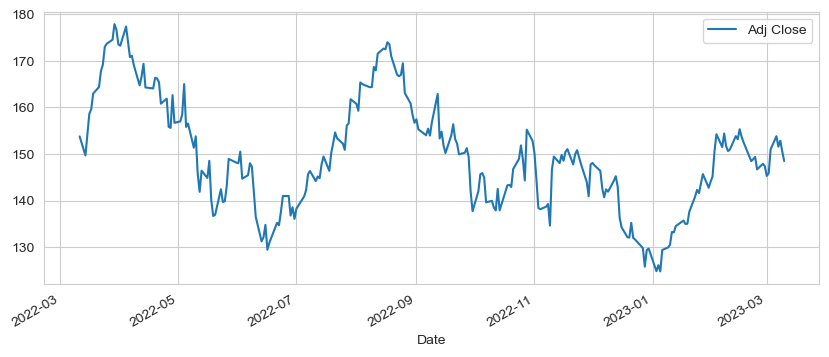

In [33]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

In [40]:
ma_day=[10,20,50]
    
for ma in ma_day:
    
    column_name = "MA for %s days" %(str(ma))
    
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

<AxesSubplot:xlabel='Date'>

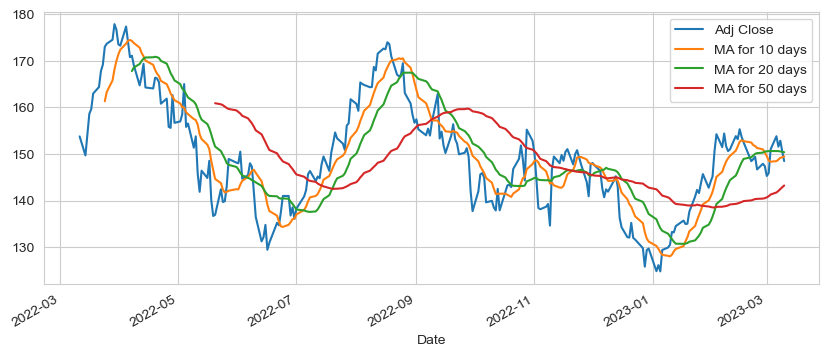

In [42]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

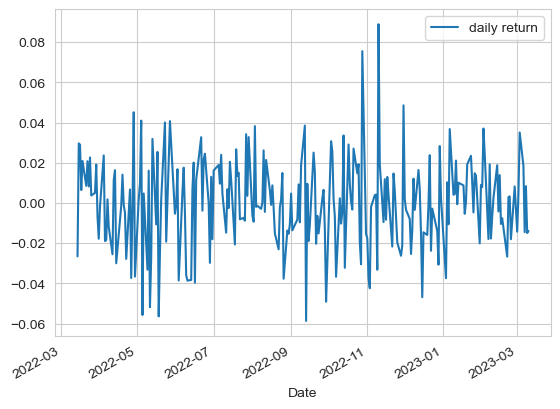

In [48]:
AAPL['daily return']=AAPL['Adj Close'].pct_change()

AAPL['daily return'].plot(legend=True)

<AxesSubplot:>

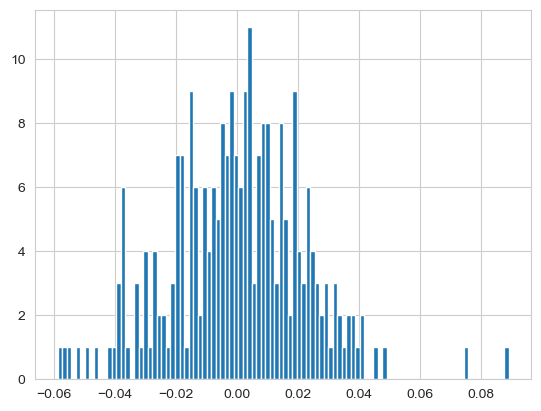

In [57]:
AAPL['daily return'].hist(bins=100)

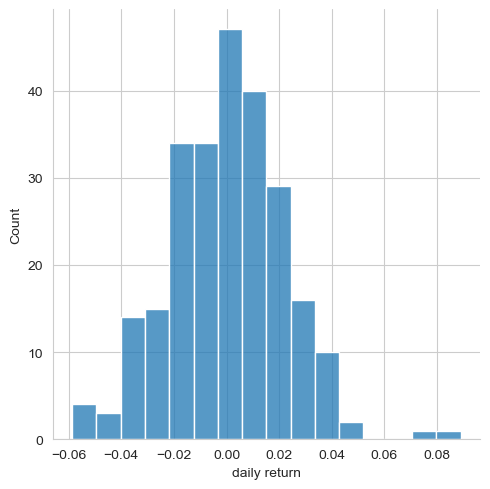

In [56]:
sns.displot(AAPL['daily return'])

In [59]:
 closing_df=yf.download(tech_list,start,end)['Adj Close']

[*********************100%***********************]  4 of 4 completed

1 Failed download:
- AAPL: No data found for this date range, symbol may be delisted


In [61]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-03-11 00:00:00,NaN,145.524506,130.475494,277.349121
2022-03-14 00:00:00,NaN,141.852997,126.740997,273.754395
2022-03-15 00:00:00,NaN,147.366501,129.660507,284.360352
2022-03-16 00:00:00,NaN,153.104004,133.690506,291.530029
2022-03-17 00:00:00,NaN,157.238998,134.600494,292.351959


In [66]:
tech_df=closing_df.pct_change()

tech_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-03-11 00:00:00,NaN,NaN,NaN,NaN
2022-03-14 00:00:00,NaN,-0.025229,-0.028622,-0.012961
2022-03-15 00:00:00,NaN,0.038868,0.023035,0.038743
2022-03-16 00:00:00,NaN,0.038934,0.031081,0.025213
2022-03-17 00:00:00,NaN,0.027008,0.006807,0.002819


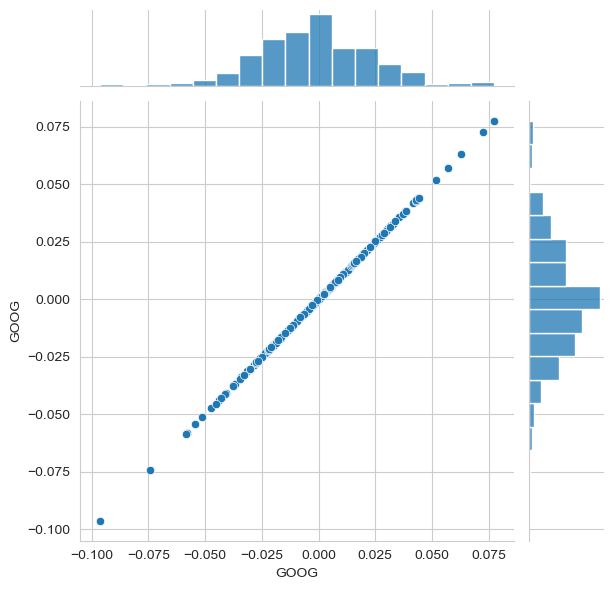

In [69]:
#compare two diff stocks

sns.jointplot(x='GOOG',y='GOOG',data=tech_df)

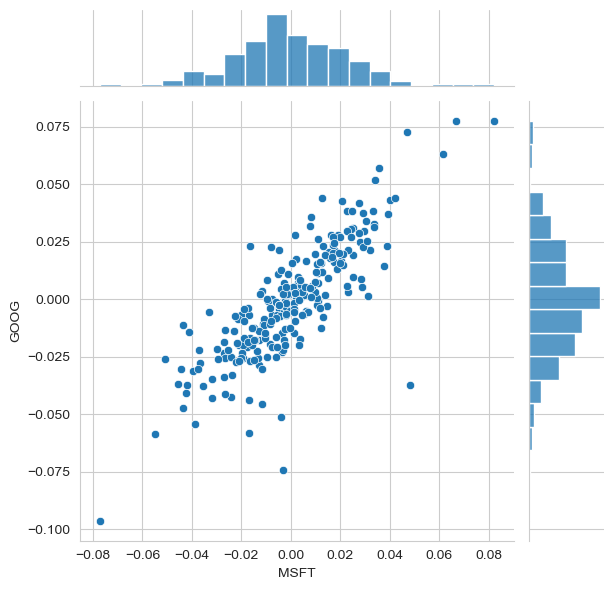

In [72]:
sns.jointplot(x='MSFT',y='GOOG',data=tech_df)

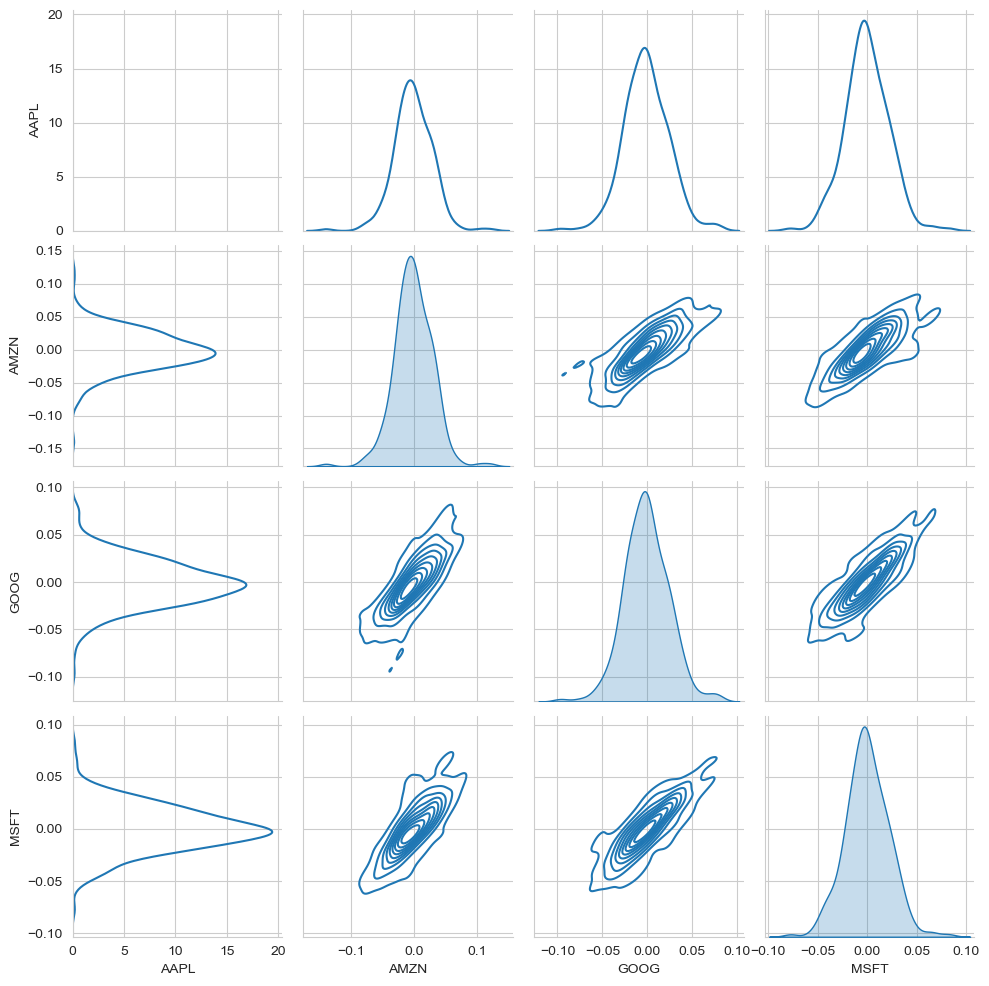

In [84]:
#pair plots

sns.pairplot(tech_df,kind='kde')